In [164]:
!ls -laFh /data/books/machine-learning-for-engineers/

total 628K
drwxr-xr-x 7 root root  224 Jan  5 10:23 ./
drwxr-xr-x 3 root root   96 Jan  2 16:39 ../
-rw-r--r-- 1 root root  182 Jan  5 10:20 CHD.csv.bz2
-rw-r--r-- 1 root root 606K Jan  2 16:40 blue_jay.jpg
-rw-r--r-- 1 root root  667 Jan  2 16:40 iris.csv.bz2
-rw-r--r-- 1 root root 5.1K Jan  2 16:40 mpg.csv.bz2
-rw-r--r-- 1 root root   93 Jan  2 16:40 sample_missing_data.csv.bz2


In [162]:
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [99]:
sns.set(style='whitegrid', context='notebook')

In [100]:
%%markdown
* We could have used ```sns.load_dataset('iris')```, loading data from [http://github.com/mwaskom/seaborn-data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv),
but for convenience reason, the data has already been downloaded and [added to that repository](https://github.com/machine-learning-helpers/docker-python-jupyter/tree/master/data/books/machine-learning-for-engineers/chapter-02).

* We could have used ```sns.load_dataset('iris')```, loading data from [http://github.com/mwaskom/seaborn-data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv),
but for convenience reason, the data has already been downloaded and [added to that repository](https://github.com/machine-learning-helpers/docker-python-jupyter/tree/master/data/books/machine-learning-for-engineers/chapter-02).

In [133]:
iris2 = pd.read_csv('/data/books/machine-learning-for-engineers/iris.csv.bz2')
iris2.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [134]:
%%markdown
# References
* [Wikipedia definition of the covariance](http://en.wikipedia.org/wiki/Covariance)

# References
* [Wikipedia definition of the covariance](http://en.wikipedia.org/wiki/Covariance)

In [135]:
def covariance (X, Y, bias = False):
    """Calculate the covariance, with or without a bias."""
    xhat = np.mean(X)
    yhat = np.mean(Y)
    epsilon = 0
    for (x, y) in zip (X, Y):
        epsilon += (x - xhat) * (y - yhat)
    cov = 0.0
    if (bias == True): cov = epsilon / len(X)
    else: cov = epsilon / (len(X) - 1)
    return cov

In [136]:
X = [1,3,4]
Y = [1,0,2]
lbias = False
print ("Mean, variance and stddev of X: ", np.mean(X), np.var(X), np.sqrt(np.var(X)))
print ("Mean, variance and stddev of Y: ", np.mean(Y), np.var(Y), np.sqrt(np.var(Y)))
print ("Covariance of X and Y: ", covariance (X, Y, bias=lbias))
print ("Covariance matrix of (X, Y):\n", np.cov(X, Y, bias=lbias))


Mean, variance and stddev of X:  2.66666666667 1.55555555556 1.24721912892
Mean, variance and stddev of Y:  1.0 0.666666666667 0.816496580928
Covariance of X and Y:  0.5
Covariance matrix of (X, Y):
 [[ 2.33333333  0.5       ]
 [ 0.5         1.        ]]


In [137]:
def correlation (X, Y):
    return (covariance(X,Y) / (np.std(X, ddof=1) * np.std(Y, ddof=1)))
    

In [138]:
print (correlation ([1,1,4,3], [1,0,2,2]))
print (np.corrcoef ([1,1,4,3], [1,0,2,2]))


0.870388279778
[[ 1.          0.87038828]
 [ 0.87038828  1.        ]]


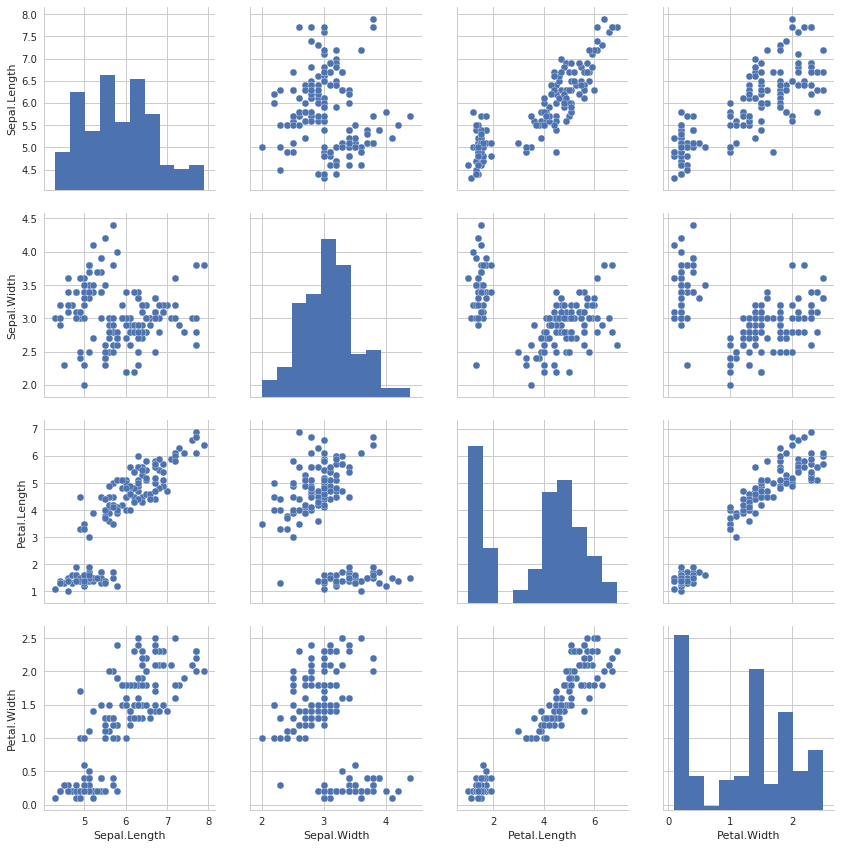

In [139]:
sns.pairplot(iris2, size=3.0)

In [140]:
X = iris2['Petal.Width']
Y = iris2['Petal.Length']

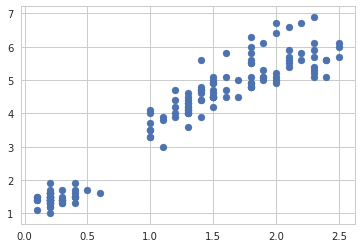

In [141]:
plt.scatter(X,Y)

In [142]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha


In [143]:
def error(alpha, beta, x_i, y_i): #L1
    return y_i - predict(alpha, beta, x_i)

def sum_sq_e(alpha, beta, x, y): #L2
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(x, y))
    

In [144]:
def correlation_fit(x, y):
    beta = correlation(x, y) * np.std(y, ddof=1) / np.std(x,ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta


In [145]:
alpha, beta = correlation_fit(X, Y)
print(alpha)
print(beta)


1.08355803285
2.22994049512


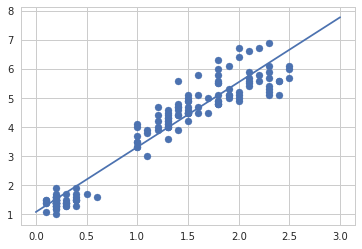

In [146]:
plt.scatter(X, Y)
xr = np.arange(0, 3.5)
plt.plot(xr, (xr*beta)+alpha)


In [147]:
%%markdown
# Polynomial regression and an introduction to underfitting and overfitting

# Polynomial regression and an introduction to underfitting and overfitting

/usr/lib64/python3.4/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0927266192998027e-17 / 1.1102230246251565e-16
  RuntimeWarning)


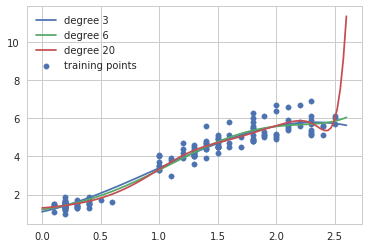

In [148]:
ix = iris2['Petal.Width']
iy = iris2['Petal.Length']

# generate points used to represent the fitted function
x_plot = np.linspace(0, 2.6, 100)

# create matrix versions of these arrays
X = ix[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
plt.scatter(ix, iy, s=30, marker='o', label="training points")
for count, degree in enumerate([3, 6, 20]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, iy)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

    plt.legend(loc='upper left')
plt.show()

In [149]:
%%markdown
# Linear regression with gradient descent in practice

# Linear regression with gradient descent in practice

In [150]:
def least_squares(b0, b1, points):
    totalError = 0
    N = float(len(points))
    for x,y in points:
        totalError += (y - (b1 * x + b0)) ** 2

    return totalError / 2.*N


In [151]:
def step_gradient(b0_current, b1_current, points, learningRate):
    b0_gradient = 0
    b1_gradient = 0
    N = float(len(points))
    for x,y in points:
        b0_gradient += (1/N) * (y - ((b1_current * x) + b0_current))
        b1_gradient += (1/N) * x * (y - ((b1_current * x) + b0_current))
    
    new_b0 = b0_current + (learningRate * b0_gradient)
    new_b1 = b1_current + (learningRate * b1_gradient)
    return [new_b0, new_b1, least_squares(new_b0, new_b1, points)]


In [152]:
def run_gradient_descent(points, starting_b0, starting_b1, learning_rate, num_iterations):
    b0 = starting_b0
    b1 = starting_b1
    slope = []
    intersect = []
    error = []
    for i in range(num_iterations):
        b0, b1 , e= step_gradient(b0, b1, np.array(points), learning_rate)
        slope.append(b1)
        intersect.append(b0)
        error.append(e)
    
    return [b0, b1, e, slope, intersect,error]


In [153]:
iris = iris2
X = iris['Petal.Width'].tolist()
Y = iris['Petal.Length'].tolist()
points = np.dstack((X,Y))[0]
    

Text(0.5,1,'Regression, alpha=0.001, initial values=(0,0), it=1000')

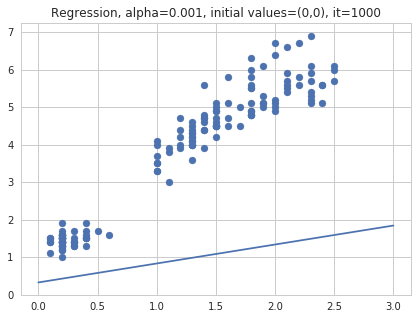

In [154]:
learning_rate = 0.0001
initial_b0 = 0
initial_b1 = 0
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, \
                initial_b0, initial_b1, learning_rate, num_iterations)

plt.figure(figsize=(7,5))
plt.scatter(X,Y)
xr = np.arange(0,3.5)
plt.plot(xr,(xr*b1)+b0);
plt.title('Regression, alpha=0.001, initial values=(0,0), it=1000')


Text(0.5,1,'Error for 1000 iterations')

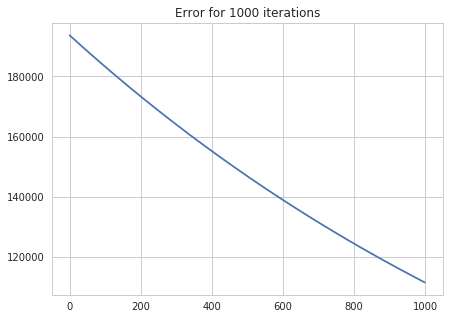

In [155]:
plt.figure(figsize=(7,5))
xr = np.arange(0,1000)
plt.plot(xr,np.array(error).transpose())
plt.title('Error for 1000 iterations')

Text(0.5,1,'Error for 1000 iterations, increased step by tenfold')

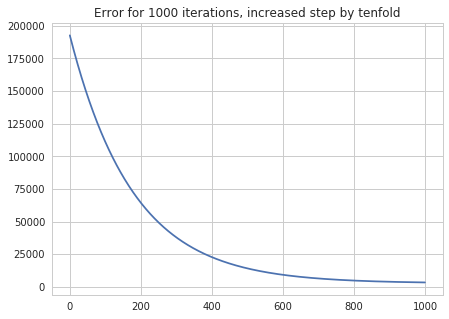

In [156]:
learning_rate = 0.001 #Last one was 0.0001
initial_b0 = 0
initial_b1 = 0
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, \
        initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr = np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, increased step by tenfold')

Text(0.5,1,'Regression, alpha=0.01, initial values=(0,0), it=1000')

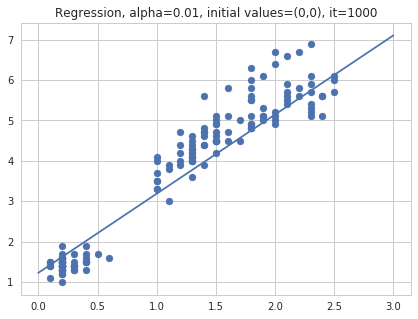

In [157]:
plt.figure(figsize=(7,5))
plt.scatter(X,Y)
xr = np.arange(0,3.5)
plt.plot(xr,(xr*b1)+b0);
plt.title('Regression, alpha=0.01, initial values=(0,0), it=1000')

Text(0.5,1,'Error for 1000 iterations, big step')

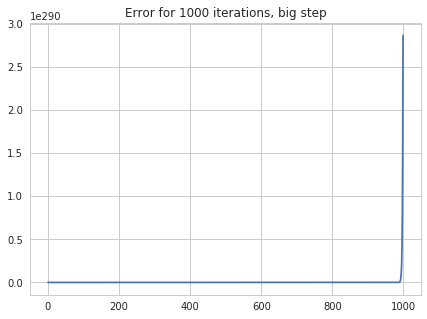

In [158]:
learning_rate = 0.85 #LAst one was 0.0001
initial_b0 = 0
initial_b1 = 0
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, \
        initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr = np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, big step')

Text(0.5,1,'Error for 1000 iterations, step 0.001, random initial parameter values')

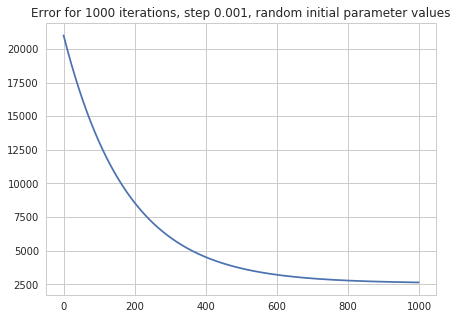

In [159]:
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, \
   initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr = np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values')

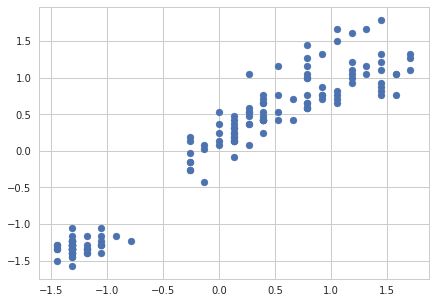

In [160]:
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
x_mean =np.mean(points[:,0])
y_mean = np.mean(points[:,1])
x_std = np.std(points[:,0])
y_std = np.std(points[:,1])
X_normalized = (points[:,0] - x_mean)/x_std
Y_normalized = (points[:,1] - y_mean)/y_std
plt.figure(figsize=(7,5))
plt.scatter(X_normalized,Y_normalized)    

Text(0.5,1,'Error for 1000 iterations, step 0.001, random initial parameter values, normalized initial values')

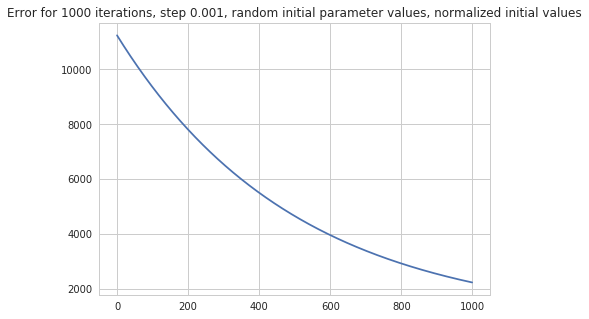

In [161]:
points=np.dstack((X_normalized,Y_normalized))[0]
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, \
   initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr = np.arange(0,1000)
plt.plot(xr,np.array(error).transpose())
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values, normalized initial values')

In [163]:
%%markdown
# Practical example – cardiac disease modeling with logistic regression

# Practical example – cardiac disease modeling with logistic regression

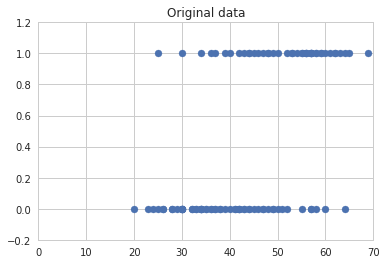

In [169]:
df = pd.read_csv("/data/books/machine-learning-for-engineers/CHD.csv.bz2", header = 0)
plt.figure() # Create a new figure
plt.axis ([0,70,-0.2,1.2])
plt.title('Original data')
# Plot a scatter draw of the random datapoints
plt.scatter(df['age'],df['chd'])
    

In [172]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(df['age'].values.reshape(100,1), df['chd'].values.reshape(100,1))
linear_model.LogisticRegression (C = 100000.0, class_weight = None, dual = False, \
                    fit_intercept = True, intercept_scaling = 1, max_iter = 100, \
                    multi_class = 'ovr', n_jobs = 1, penalty = 'l2', random_state = None, \
                    solver = 'liblinear', tol = 0.0001, verbose = 0, warm_start = False)


/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

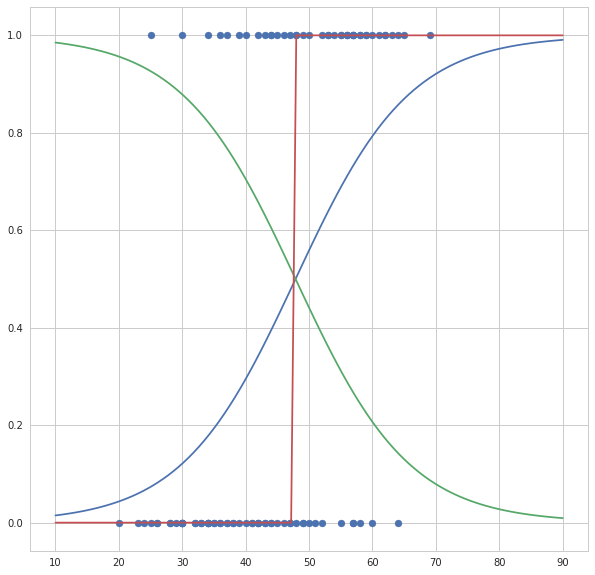

In [174]:
x_plot = np.linspace(10, 90, 100)
oneprob=[]
zeroprob=[]
predict=[]
plt.figure(figsize=(10,10))
for i in x_plot:
    oneprob.append (logistic.predict_proba(i)[0][1]);
    zeroprob.append (logistic.predict_proba(i)[0][0]);
    predict.append (logistic.predict(i)[0]);

plt.plot(x_plot, oneprob);
plt.plot(x_plot, zeroprob)
plt.plot(x_plot, predict);
plt.scatter(df['age'],df['chd'])